#### **Team Information**
Major Subject: Multivariate Statistical Analysis

Group: 10

Topic: Principle Component Analysis (PCA)

| No. | Name             | Student ID| Class    | Email                       |
|-----|------------------|-----------|----------|-----------------------------|
| 1   | Phan Trí Nguyên  | 20127578  | 20TGMT01 |20127578@student.hcmus.edu.vn|
| 2   | Nguyễn Mạnh Hùng | 20127030  | 20TGMT01 |20127030@student.hcmus.edu.vn|
| 3   | Lưu Hoàng Minh   | 20127048  | 20TGMT01 |20127048@student.hcmus.edu.vn|

Tài liệu tham khảo: [Tuong Nguyen Huy, ML From Scratch: PCA . Data Dimension Reduction Algorithm by [Oct 12, 2022]](https://viblo.asia/p/ml-from-scratch-thuat-toan-giam-chieu-du-lieu-pca-7ymJXKMa4kq)

# **2. Principle Component Analysis Project**

## Step 1: Access into our code through Google Drive

#### 1.1 Access into Google Drive in order to load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1.2 Move into the repository directory

In [ ]:
%cd /content/drive/MyDrive
!rm -rf PCA
!git clone https://github.com/phantringuyen/PCA.git
%cd /content/drive/MyDrive/PCA/dataset

/content/drive/MyDrive
Cloning into 'PCA'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), 2.40 KiB | 35.00 KiB/s, done.
/content/drive/MyDrive/PCA/dataset


## Step 2: Import some necessary essary libraries for this program

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Step 3: Prepare dataset

In [ ]:
# step 1: tải dữ liệu từ tệp CSV vào đối tượng Pandas DataFrame có tên là df
df = pd.read_csv('Iris.csv')

# step 2: bước này trích xuất các giá trị của bốn cột: độ dài đài hoa, độ rộng đài hoa, độ dài cánh hoa và độ rộng cánh hoa
# ; từ khung dữ liệu gấu trúc “df” và lưu trữ chúng trong một mảng gọn gàng có tên là “X”.
X = df[["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm", "PetalWidthCm"]].to_numpy()

# step 3: trích xuất các giá trị của cột “Loài” từ khung dữ liệu gấu trúc “df” và lưu trữ chúng dưới dạng mảng
list_label = df["Species"].to_numpy()

## Step 4: Build a class named "PCA" 

In [ ]:
class PCA:
  def __init__(self, n_dimention: int):
    # step 0: chuẩn bị dữ liệu cần giảm chiều là X với kích thước (n_sample, n_feature)
    self.n_dimention = n_dimention

  def fit_transform(self, X): 
    # step 1: tính toán mean vector
    mean = np.mean(X, axis=0)

    # step 2: sẽ trừ mỗi điểm dữ liệu cho vector kỳ vọng: X=X-mean
    X = X - mean

    # step 3: tính ma trận hiệp phương sai
    cov = X.T.dot(X) / X.shape[0] 

    # step 4: tìm trị riêng, vector riêng của ma trận S
    eigen_values, eigen_vectors, = np.linalg.eig(cov)

    # step 5: sắp xếp chúng theo thứ tự giảm dần của trị riêng
    select_index = np.argsort(eigen_values)[::-1][:self.n_dimention]

    # step 6: K vector riêng ứng với K trị riêng lớn nhất để xây dựng ma trận A
    A = eigen_vectors[:, select_index]

    # step 7: ánh xạ không gian ban đầu sang không gian k chiều dưới công thức: Y=X*A 
    Y = X.dot(A)

    return Y

## Step 5: Display a 3D plot based on three different characteristics of each three species of flower, including sepal length, sepal width, petal length

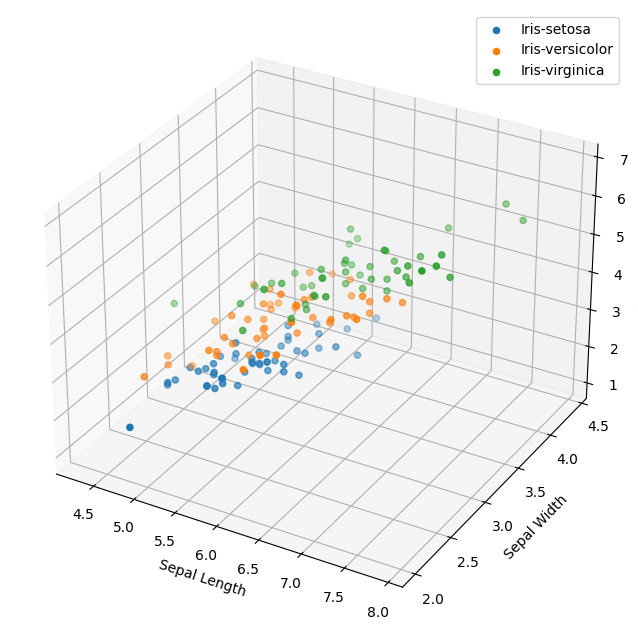

In [ ]:
# step 1:
fig = plt.figure(figsize=(10,8))

# step 2:
ax = fig.add_subplot(111, projection='3d')

# step 3:
for label in set(list_label):
  X_class = X[label == list_label]
  ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label=label)

# step 4:
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# step 5:
plt.legend()

# step 6:
plt.show()

## Step 6: Display a 2D plot by using PCA algorithm

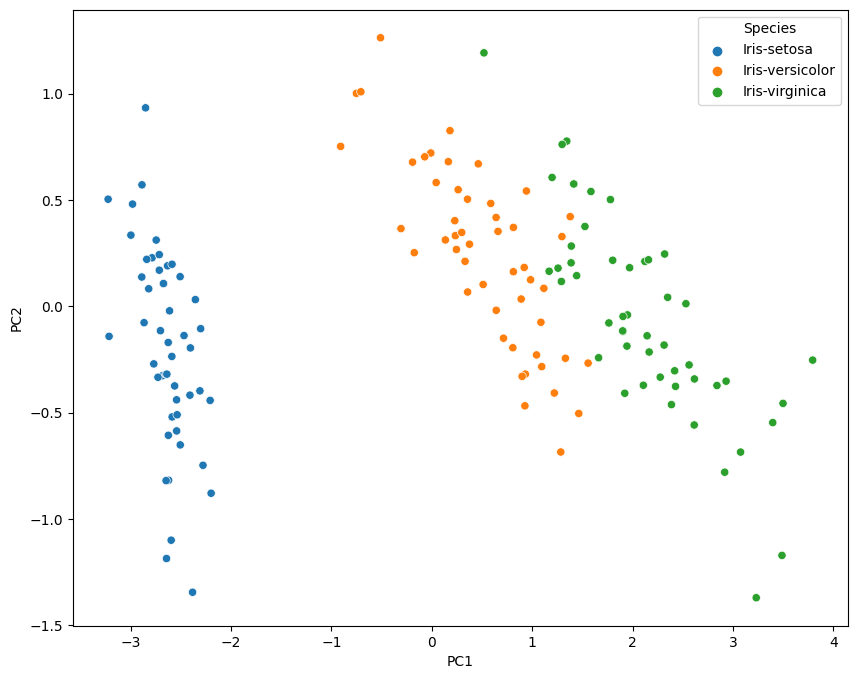

In [ ]:
# step 1: thực hiện thuật toán Phân tích thành phần chính là lớp PCA đã xác định trước đó, với số chiều là một số nguyên được đặt thành 2
pca = PCA(n_dimention=2)

# step 2: giảm kích thước cho dữ liệu đầu vào X và trả về tập dữ liệu mới new_X với chỉ còn 2 chiều
Y = pca.fit_transform(X)

# step 3: Tạo một khung dữ liệu Pandas DataFrame mới với đầu vào là dữ liệu vừa thực thi tại bước 2
# các cột gồm 2 giá trị tương ứng với biểu đồ 2 chiều, PC1 và PC2.
df_new = pd.DataFrame(data=Y, columns=["PC1", "PC2"])

# step 4: thêm một cột mới vào khung dữ liệu df_new với biến mục tiêu Y, chứa nhãn loài của từng mẫu trong X
df_new["Species"] = list_label

plt.figure(figsize=(10, 8))

# step 5: Tạo một scatter plot bằng thư viện Seaborn
sns.scatterplot(x="PC1", y="PC2", hue="Species", data=df_new)

# và in kết quả ra màn hình
plt.show()